## Example of MangaLineExtraction-hf


In [16]:
from PIL import Image
import torch

from transformers import AutoModel, AutoImageProcessor

In [17]:
REPO_NAME = "p1atdev/MangaLineExtraction-hf"

model = AutoModel.from_pretrained(REPO_NAME, trust_remote_code=True)
processor = AutoImageProcessor.from_pretrained(REPO_NAME, trust_remote_code=True)

preprocessor_config.json:   0%|          | 0.00/336 [00:00<?, ?B/s]

image_processing_mle.py:   0%|          | 0.00/19.1k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/p1atdev/MangaLineExtraction-hf:
- image_processing_mle.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


### Load an image


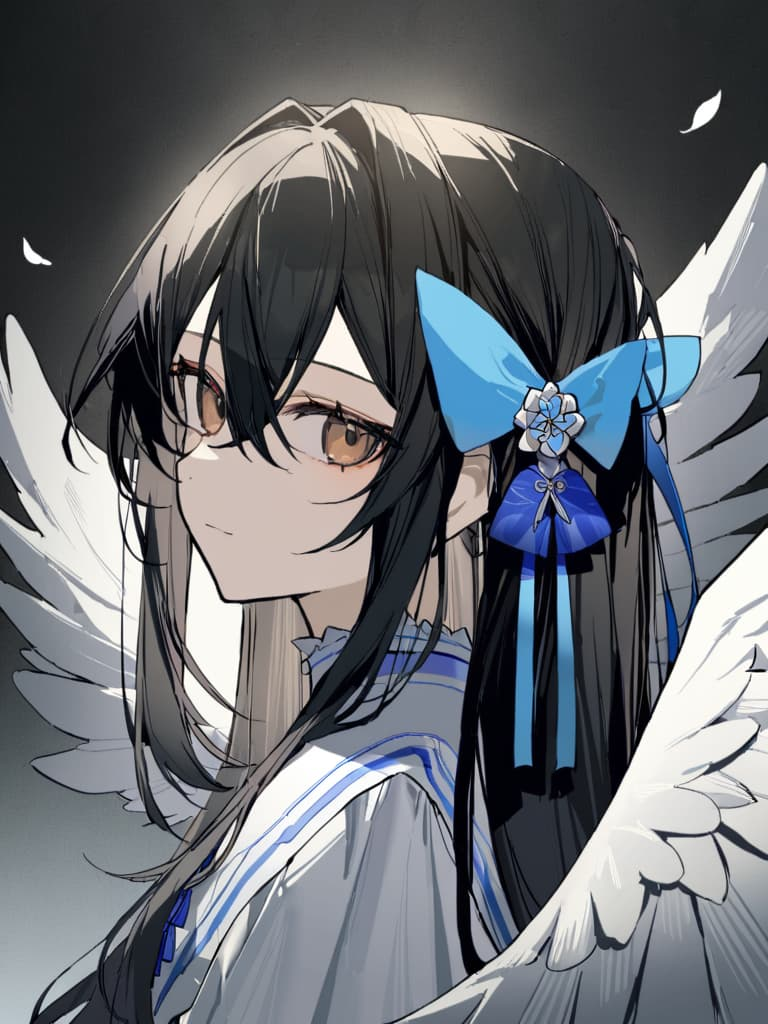

In [18]:
image = Image.open("./sample.jpg")
image

### Process


In [22]:
inputs = processor(image, return_tensors="pt")

In [21]:
with torch.no_grad():
    outputs = model(inputs.pixel_values)
outputs

MLEForAnimeLineExtractionOutput(last_hidden_state=tensor([[[[252.9141, 254.1066, 254.2230,  ..., 254.4317, 254.1815, 250.0452],
          [254.1399, 254.2865, 254.6275,  ..., 255.2207, 254.7857, 253.9831],
          [254.3383, 254.7226, 254.9501,  ..., 254.9454, 255.1576, 254.2286],
          ...,
          [254.3697, 254.6702, 254.7760,  ..., 256.0859, 256.3971, 254.8756],
          [254.2661, 254.2267, 254.7112,  ..., 255.9406, 255.9404, 254.6525],
          [251.3199, 254.1283, 254.2599,  ..., 254.3232, 254.0325, 252.3318]]]]), pixel_values=tensor([[[252.9141, 254.1066, 254.2230,  ..., 254.4317, 254.1815, 250.0452],
         [254.1399, 254.2865, 254.6275,  ..., 255.0000, 254.7857, 253.9831],
         [254.3383, 254.7226, 254.9501,  ..., 254.9454, 255.0000, 254.2286],
         ...,
         [254.3697, 254.6702, 254.7760,  ..., 255.0000, 255.0000, 254.8756],
         [254.2661, 254.2267, 254.7112,  ..., 255.0000, 255.0000, 254.6525],
         [251.3199, 254.1283, 254.2599,  ..., 254.3

### Preview the result


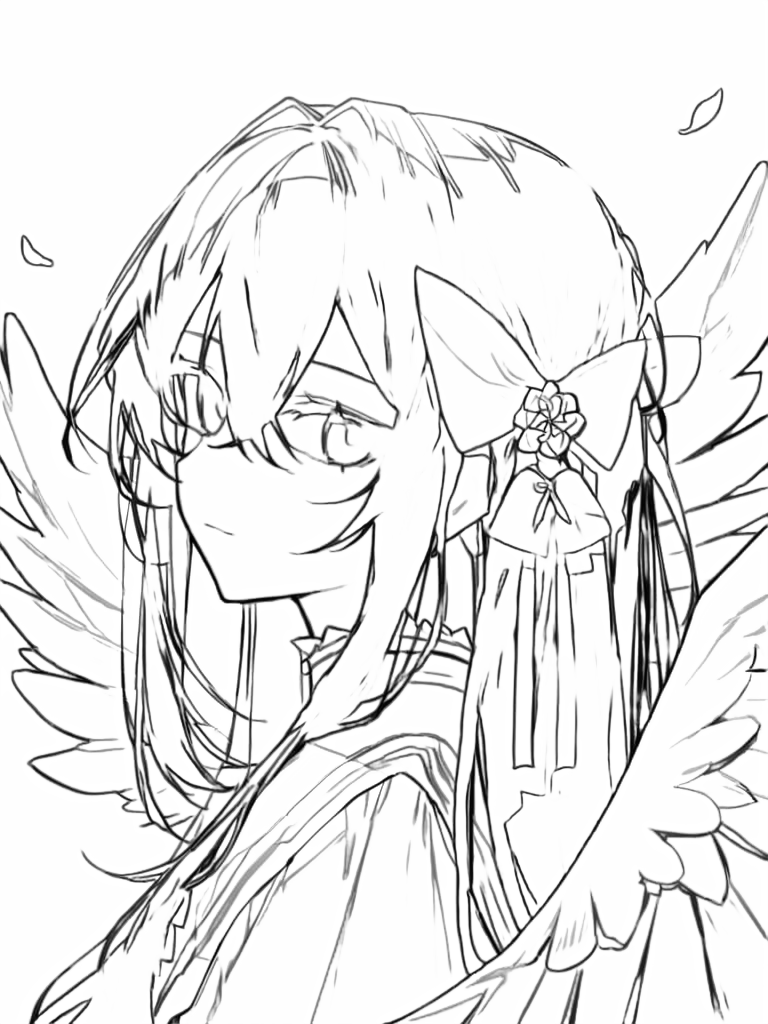

In [23]:
line_image = Image.fromarray(outputs.pixel_values[0].numpy().astype("uint8"), mode="L")
line_image

### Save the image


In [25]:
line_image.save("./line_image.png")